## ZOO 


Find a solution to the following questions:
• Unique number of high-level class
• Perform agglomerative clustering using the 16 intermediate features
• Compute the mean squared error by comparing the actual class and predicted high-level class.

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

df=pd.read_csv("/home/siddharth/Desktop/zoo.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 4 2 7 6 5 3]


<AxesSubplot:xlabel='class_type', ylabel='Count'>

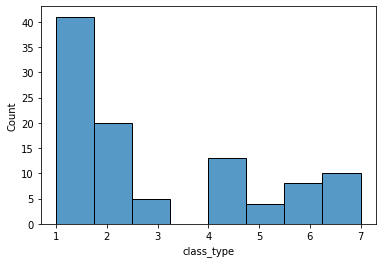

In [15]:
#Unique number of high-level class
print(df["class_type"].unique())
sns.histplot(df["class_type"])

**7 unique high level classes** 

In [16]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
df_features= df.drop(["class_type", "animal_name"], axis=1)

In [23]:
df_class= df["class_type"]

In [26]:
df_features.shape

(101, 16)

In [43]:
# Perform agglomerative clustering using the 16 intermediate features

In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error

In [47]:
model= AgglomerativeClustering(n_clusters=7, linkage = 'average', affinity='cosine')

In [48]:
model.fit(df_features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [49]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

In [50]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [51]:
print(np.unique(model.labels_+1))

[1 2 3 4 5 6 7]


In [52]:
model_labels=model.labels_+1

In [53]:
score=mean_squared_error(df_class, model_labels)

In [59]:
print ("absolute error =",np.sqrt(score))

absolute error = 2.4373333911071624
